In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
data=pd.read_csv('Downloads/BreastCancer.csv')

In [3]:
data=pd.DataFrame(data)

In [4]:
data=data.dropna()

In [5]:
data.head(3)

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign


In [6]:
data.shape

(683, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       683 non-null    int64  
 1   Id               683 non-null    int64  
 2   Cl.thickness     683 non-null    int64  
 3   Cell.size        683 non-null    int64  
 4   Cell.shape       683 non-null    int64  
 5   Marg.adhesion    683 non-null    int64  
 6   Epith.c.size     683 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      683 non-null    int64  
 9   Normal.nucleoli  683 non-null    int64  
 10  Mitoses          683 non-null    int64  
 11  Class            683 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 69.4+ KB


In [8]:
x=data.iloc[:,2:10]

In [9]:
x.shape

(683, 8)

In [10]:
x.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli
0,5,1,1,1,2,1.0,3,1
1,5,4,4,5,7,10.0,3,2
2,3,1,1,1,2,2.0,3,1
3,6,8,8,1,3,4.0,3,7
4,4,1,1,3,2,1.0,3,1


In [11]:
y=data.iloc[:,11]

In [12]:
y.shape

(683,)

In [13]:
y.head()

0    benign
1    benign
2    benign
3    benign
4    benign
Name: Class, dtype: object

In [14]:
y.dtype

dtype('O')

In [15]:
#train and test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [18]:
#preprocessing data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
#Fit only to the training data

In [22]:
scaler.fit(x_train)

StandardScaler()

In [23]:
x_train=scaler.transform(x_train)

In [24]:
x_train

array([[ 1.21044158,  2.17880344,  0.26459835, ...,  1.74692318,
         1.8313684 , -0.2903192 ],
       [-1.19834389, -0.6971422 , -0.74139933, ..., -0.70430155,
        -0.99291058, -0.62063793],
       [ 0.52221716,  2.17880344, -0.40606677, ..., -0.43194325,
         1.42789997,  1.69159319],
       ...,
       [-0.16600726,  1.5397044 ,  0.93526346, ...,  1.74692318,
         1.42789997, -0.62063793],
       [ 1.21044158,  0.58105586,  0.59993091, ...,  1.74692318,
         0.2174947 ,  0.03999953],
       [ 1.898666  ,  1.5397044 ,  1.27059602, ...,  1.74692318,
         1.42789997,  2.02191192]])

In [25]:
x_train.shape

(512, 8)

In [26]:
x_test=scaler.transform(x_test)

In [27]:
x_test

array([[ 1.898666  ,  0.26150634,  0.59993091, ...,  1.74692318,
         0.2174947 , -0.62063793],
       [-1.19834389, -0.6971422 , -0.74139933, ..., -0.70430155,
        -0.58944215, -0.62063793],
       [-0.51011947, -0.6971422 , -0.74139933, ..., -0.70430155,
        -0.58944215,  0.03999953],
       ...,
       [-0.16600726, -0.6971422 , -0.74139933, ..., -0.70430155,
        -0.18597373, -0.62063793],
       [-0.51011947,  0.26150634,  0.59993091, ...,  1.20220658,
         0.2174947 , -0.62063793],
       [-1.19834389, -0.6971422 , -0.74139933, ..., -0.70430155,
        -0.58944215, -0.62063793]])

In [28]:
x_test.shape

(171, 8)

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30))

In [31]:
mlp.fit(x_train,y_train)

C:\Program Files\ancondapython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [32]:
#lets prediction out model

In [33]:
predictions=mlp.predict(x_test)

In [34]:
predictions# too large output

array(['malignant', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'malignant', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'malignant', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant'

In [35]:
#results

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,predictions))

[[108   6]
 [  1  56]]


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      benign       0.99      0.95      0.97       114
   malignant       0.90      0.98      0.94        57

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



In [39]:
#curve

In [40]:
from sklearn import metrics

In [41]:
from sklearn.metrics import roc_curve

In [42]:
y_pred_prob=mlp.predict_proba(x_test)[:,1]

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label='malignant')

In [44]:
auc=metrics.roc_auc_score(y_test,y_pred_prob)

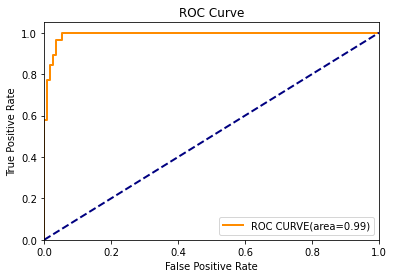

In [45]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC CURVE(area=%0.2f)' % auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### insurance

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

In [47]:
data=pd.read_csv('Downloads/insurance.csv')

In [48]:
data=pd.DataFrame(data)

In [49]:
data=data.dropna()# important step

In [50]:
data['sex'].head()

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object

In [51]:
data['sex'].dtype

dtype('O')

In [52]:
#convert words into numbers
data['sex']=data.get('sex').replace('male',1)
data['sex']=data.get('sex').replace('female',2)
c_sex=data['sex'].value_counts()
c_sex

1    676
2    662
Name: sex, dtype: int64

In [53]:
data['smoker']=data.get('smoker').replace('yes',1)
data['smoker']=data.get('smoker').replace('no',2)
c_smoker=data['smoker'].value_counts()
c_smoker

2    1064
1     274
Name: smoker, dtype: int64

In [54]:
data.head(3)

,id,age,sex,bmi,children,smoker,region,charges
0,1001,19,2,27.90,0,1,southwest,16884.9240
1,1002,18,1,33.77,1,2,southeast,1725.5523
2,1003,28,1,33.00,3,2,southeast,4449.4620


In [55]:
data.shape

(1338, 8)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 94.1+ KB


In [57]:
#we dont think that region can be predictor, so  drop this 

In [58]:
del data['region']

In [59]:
data.head(3)

,id,age,sex,bmi,children,smoker,charges
0,1001,19,2,27.90,0,1,16884.9240
1,1002,18,1,33.77,1,2,1725.5523
2,1003,28,1,33.00,3,2,4449.4620


In [60]:
data.shape

(1338, 7)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [62]:
# Lets create predictors and RV

In [63]:
x=data.iloc[:,0:5]

In [64]:
x.shape

(1338, 5)

In [65]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 62.7 KB


In [66]:
y=data.iloc[:,5]

In [67]:
y.shape

(1338,)

In [68]:
y.dtype#float64

dtype('int64')

In [69]:
#train and test data
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [71]:
#pre_processing of data

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [74]:
scaler = StandardScaler()
scaler.fit(x)


StandardScaler()

In [75]:
#Now apply the transformation to the data:
x_train=scaler.transform(x_train)

In [76]:
x_train

array([[-0.16440248,  0.83967383,  1.0105187 ,  0.56375578, -0.90861367],
       [ 1.22589878,  0.91087502,  1.0105187 , -0.95201522, -0.90861367],
       [-1.00324346,  1.0532774 , -0.98959079,  1.62430334,  1.58092576],
       ...,
       [ 1.22330977,  0.12766192,  1.0105187 ,  0.31768906,  1.58092576],
       [ 1.12492718,  1.33808216, -0.98959079,  0.88856385, -0.90861367],
       [-1.1948306 , -0.29954522, -0.98959079, -0.47956712,  0.75107928]])

In [77]:
x_train.shape# Look at variable explorer!

(1003, 5)

In [78]:
x_test=scaler.transform(x_test)

In [79]:
x_test

array([[ 0.16958051,  1.40928335,  1.0105187 ,  0.23566682,  1.58092576],
       [-0.18770362,  0.19886312,  1.0105187 , -0.19412972,  0.75107928],
       [ 1.29321318, -0.51314879, -0.98959079,  0.7442047 ,  0.75107928],
       ...,
       [-1.42007494,  0.3412655 , -0.98959079,  1.05588922,  0.75107928],
       [ 1.598717  , -0.79795355,  1.0105187 , -2.19383194, -0.90861367],
       [-0.72104078,  0.62607026, -0.98959079,  0.81392361,  2.41077224]])

In [80]:
x_test.shape

(335, 5)

In [81]:
from sklearn.neural_network import MLPRegressor

In [82]:
mlp=MLPRegressor(hidden_layer_sizes=(30,30,30))

In [83]:
mlp

MLPRegressor(hidden_layer_sizes=(30, 30, 30))

In [84]:
mlp.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(30, 30, 30))

In [85]:
#lets  predict our model

In [86]:
predictions=mlp.predict(x_test)
error=y_test-predictions
error

734     0.115431
596     0.187725
1168    0.343256
359     0.406749
930     0.640738
          ...   
1132    0.173736
781     0.448531
120     0.392011
1286    0.304028
390     0.233444
Name: smoker, Length: 335, dtype: float64

In [87]:
len(error)

335

In [88]:
squared_errors=error*error

In [89]:
squared_errors

734     0.013324
596     0.035241
1168    0.117825
359     0.165445
930     0.410545
          ...   
1132    0.030184
781     0.201180
120     0.153672
1286    0.092433
390     0.054496
Name: smoker, Length: 335, dtype: float64

In [90]:
sum_squared_errors=sum(squared_errors)
sum_squared_errors_by_n=sum_squared_errors/335


In [91]:
import math
RMSE=math.sqrt(sum_squared_errors_by_n)

In [92]:
RMSE

0.41495783342501974

In [93]:
x=np.arange(0,335,1)

In [94]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<function matplotlib.pyplot.show(close=None, block=None)>

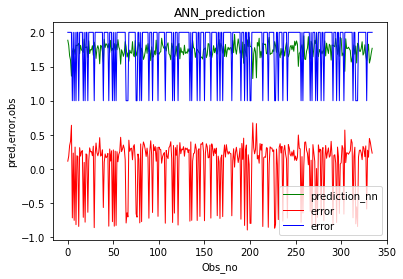

In [98]:
plt.plot(x,predictions,'g',label='prediction_nn',linewidth=1)
plt.plot(x,error,'r',label='error',linewidth=1)
plt.plot(x,y_test,'b',label='error',linewidth=1)
plt.title('ANN_prediction')
plt.xlabel('Obs_no')
plt.ylabel('pred,error,obs')
plt.legend()
plt.show

In [99]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor=LinearRegression()
lin_reg=regressor.fit(x_train,y_train)#training the algorithm
predictions1=lin_reg.predict(x_test)
error1=y_test-predictions1
error1

734     0.159563
596     0.170305
1168    0.269498
359     0.180932
930     0.266023
          ...   
1132    0.230952
781     0.265605
120     0.223271
1286    0.197588
390     0.235729
Name: smoker, Length: 335, dtype: float64

In [100]:
len(error1)#335

335

In [101]:
squared_errors1=error1*error1

In [102]:
squared_errors1

734     0.025460
596     0.029004
1168    0.072629
359     0.032736
930     0.070768
          ...   
1132    0.053339
781     0.070546
120     0.049850
1286    0.039041
390     0.055568
Name: smoker, Length: 335, dtype: float64

In [104]:
sum_squared_errors1=sum(squared_errors1)

In [105]:
sum_squared_errors_by_n1=sum_squared_errors1/335

In [106]:
import math

In [107]:
RMSE1=math.sqrt(sum_squared_errors_by_n1)


In [108]:
RMSE1

0.39980951890220734

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\ancondapython\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\ancondapython\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\ancondapython\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\ancondapython\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connecti